In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'C:\\Users\\Florian\\Projet7_utils.py'>

In [134]:
#!pip install imbalanced-learn

In [135]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df_train = pd.read_csv(os.path.join(PATH, "application_train.csv"))
df_test = pd.read_csv(os.path.join(PATH, "application_test.csv"))

df = pd.concat([df_train, df_test], axis=0)

In [136]:
df = df.reset_index()
df = df.drop('index', axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [137]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [138]:
importlib.reload(utils)

utils.diff_lists(df_train.columns.tolist(), df_test.columns.tolist())[0]

['TARGET']

In [139]:
#df_train = df_train.set_index('SK_ID_CURR')

In [140]:
"""to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
]

df = df.drop(to_drop, axis=1)
df"""

"to_drop = [\n    'NAME_TYPE_SUITE',\n    'WEEKDAY_APPR_PROCESS_START',\n    'HOUR_APPR_PROCESS_START',\n    'OWN_CAR_AGE',\n]\n\ndf = df.drop(to_drop, axis=1)\ndf"

In [141]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [142]:
ind = df.loc[df['CODE_GENDER']=='XNA'].index
ind_train = df_train.loc[df_train['CODE_GENDER']=='XNA'].index

df = df.drop(ind, axis=0)
df_train = df_train.drop(ind_train, axis=0)

In [143]:
importlib.reload(utils)

list_cat_to_binary = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY'    
]

for i in list_cat_to_binary:
    df[i] = utils.cat_to_binary(df[i])
    df_train[i] = utils.cat_to_binary(df_train[i])

In [144]:
list_cat_other = [i for i in df.columns.tolist() if df[i].dtypes=='O' and i not in list_cat_to_binary]
list_cat_other

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [145]:
df_train[list_cat_other].isnull().sum()

NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96389
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210293
HOUSETYPE_MODE                154296
WALLSMATERIAL_MODE            156340
EMERGENCYSTATE_MODE           145754
dtype: int64

In [146]:
#df['NAME_TYPE_SUITE'].unique()

In [147]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder()

df_train_cat = df_train[list_cat_other]
df_cat = df[list_cat_other]

imputer.fit(df_train_cat)


df_cat = pd.DataFrame(imputer.transform(df_cat), columns=df_cat.columns.tolist())
df_train_cat = pd.DataFrame(imputer.transform(df_train_cat), columns=df_train_cat.columns.tolist())
col_names = []

for i in df_cat.columns.tolist():
    for j in df_cat[i].unique():
        col_names.append(i + ':' + j)

#print(col_names)
ohe.fit(df_train_cat)
df_cat = ohe.transform(df_cat)
df_train_cat = ohe.transform(df_train_cat)

df_cat = pd.DataFrame(df_cat.todense(), columns=col_names)
df_train_cat = pd.DataFrame(df_train_cat.todense(), columns=col_names)
df_cat

,NAME_TYPE_SUITE:Unaccompanied,NAME_TYPE_SUITE:Family,"NAME_TYPE_SUITE:Spouse, partner",NAME_TYPE_SUITE:Children,NAME_TYPE_SUITE:Other_A,NAME_TYPE_SUITE:Other_B,NAME_TYPE_SUITE:Group of people,NAME_INCOME_TYPE:Working,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Commercial associate,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
356247,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
356248,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
356249,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [148]:
df = df.drop(list_cat_other, axis=1)
df_train = df_train.drop(list_cat_other, axis=1)

df = pd.concat([df, df_cat], axis=1)
df_train = pd.concat([df_train, df_train_cat], axis=1)

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,100002.0,1.0,0.0,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,1.0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,100006.0,0.0,0.0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,100007.0,0.0,0.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307507,456252.0,0.0,0.0,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253.0,0.0,0.0,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254.0,1.0,0.0,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,100002.0,1.0,0.0,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,1.0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,100006.0,0.0,0.0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,100007.0,0.0,0.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221.0,NaN,0.0,1.0,0.0,0.0,0.0,121500.0,412560.0,17473.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
356251,456222.0,NaN,0.0,1.0,0.0,1.0,2.0,157500.0,622413.0,31909.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,456223.0,NaN,0.0,1.0,1.0,0.0,1.0,202500.0,315000.0,33205.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356253,456224.0,NaN,0.0,0.0,0.0,1.0,0.0,225000.0,450000.0,25128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [31]:
df_train.isnull().sum().sort_values(ascending=False).head(50)

COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
ELEVATORS_MODE                  163891
ELEVATORS_AVG                   163891
ELEVATORS_MEDI                  163891
APARTMENTS_MODE                 156061
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
ENTRANCES_MEDI                  154828
ENTRANCES_MODE           

In [32]:
importlib.reload(utils)

List_AVG = [i for i in df_train.columns.tolist() if '_AVG' in i and i not in list_cat_other]
List_MEDI = [i for i in df_train.columns.tolist() if '_MEDI' in i and i not in list_cat_other]
List_MODE = [i for i in df_train.columns.tolist() if '_MODE' in i and i not in list_cat_other]

df_train[List_AVG] = utils.imput(df_train, List_AVG, 'mean')
df_train[List_MEDI] = utils.imput(df_train, List_MEDI, 'median')
df_train[List_MODE] = utils.imput(df_train, List_MODE, 'most_frequent')

In [33]:
df_train.isnull().sum().sort_values(ascending=False).head(15)

AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
CNT_FAM_MEMBERS                   2
TOTALAREA_MODE                    0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
dtype: int64

In [41]:
ind = df_train.loc[df_train['AMT_GOODS_PRICE'].isna()].index
print(ind)
df_train = df_train.drop(ind, axis=0)

Int64Index([], dtype='int64')


In [42]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,100002,1,0,0,0,0,0,202500.0,406597.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,1129500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,100007,0,0,0,0,0,0,121500.0,513000.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,1,0,157500.0,254700.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0,0,1,0,0,0,72000.0,269550.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,456253,0,0,1,0,0,0,153000.0,677664.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,456254,1,0,1,0,0,0,171000.0,370107.0,319500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
ind = df_train.loc[df_train['CNT_FAM_MEMBERS'].isna()].index
df_train = df_train.drop(ind, axis=0)

In [44]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,100002,1,0,0,0,0,0,202500.0,406597.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,1129500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,100007,0,0,0,0,0,0,121500.0,513000.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,1,0,157500.0,254700.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0,0,1,0,0,0,72000.0,269550.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,456253,0,0,1,0,0,0,153000.0,677664.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,456254,1,0,1,0,0,0,171000.0,370107.0,319500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
df_train.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
0,100002,1,0,0,0,0,0,202500.0,406597.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,1129500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,100007,0,0,0,0,0,0,121500.0,513000.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,1,0,157500.0,254700.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,456252,0,0,1,0,0,0,72000.0,269550.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,456253,0,0,1,0,0,0,153000.0,677664.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,456254,1,0,1,0,0,0,171000.0,370107.0,319500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
df_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [153]:
df_train['AMT_INCOME_TOTAL'].describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [154]:
df_train['AMT_CREDIT'].describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [155]:
df_train.loc[df_train['DAYS_EMPLOYED']>=0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic,EMERGENCYSTATE_MODE:No,EMERGENCYSTATE_MODE:Yes
8,100011.0,0.0,0.0,1.0,0.0,0.0,0.0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,100015.0,0.0,0.0,1.0,0.0,0.0,0.0,38419.155,148365.0,10678.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23,100027.0,0.0,0.0,1.0,0.0,0.0,0.0,83250.000,239850.0,23850.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38,100045.0,0.0,0.0,1.0,0.0,0.0,0.0,99000.000,247275.0,17338.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
43,100050.0,0.0,0.0,1.0,0.0,0.0,0.0,108000.000,746280.0,42970.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209.0,0.0,0.0,1.0,0.0,0.0,0.0,202500.000,703728.0,29943.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307483,456227.0,0.0,0.0,1.0,0.0,0.0,0.0,99000.000,247275.0,16479.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307487,456231.0,0.0,0.0,0.0,0.0,0.0,0.0,117000.000,1071909.0,31473.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307505,456249.0,0.0,0.0,1.0,0.0,0.0,0.0,112500.000,225000.0,22050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


(array([  2284.,  25390., 224459.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,  55374.]),
 array([-17912.        , -11526.08333333,  -5140.16666667,   1245.75      ,
          7631.66666667,  14017.58333333,  20403.5       ,  26789.41666667,
         33175.33333333,  39561.25      ,  45947.16666667,  52333.08333333,
         58719.        ,  65104.91666667,  71490.83333333,  77876.75      ,
         84262.66666667,  90648.58333333,  97034.5       , 103420.41666667,
      

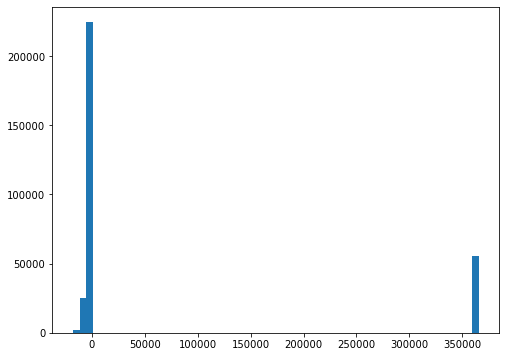

In [160]:
plt.figure(figsize=(8, 6))
plt.hist(df_train['DAYS_EMPLOYED'], bins=60)